In [58]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from matplotlib import gridspec
import scipy.stats as stats
sns.set_style('whitegrid')

In [30]:
#import dataset
df = pd.read_csv('data.csv')

#### Take a general look of the data

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Check for missing values

<AxesSubplot:>

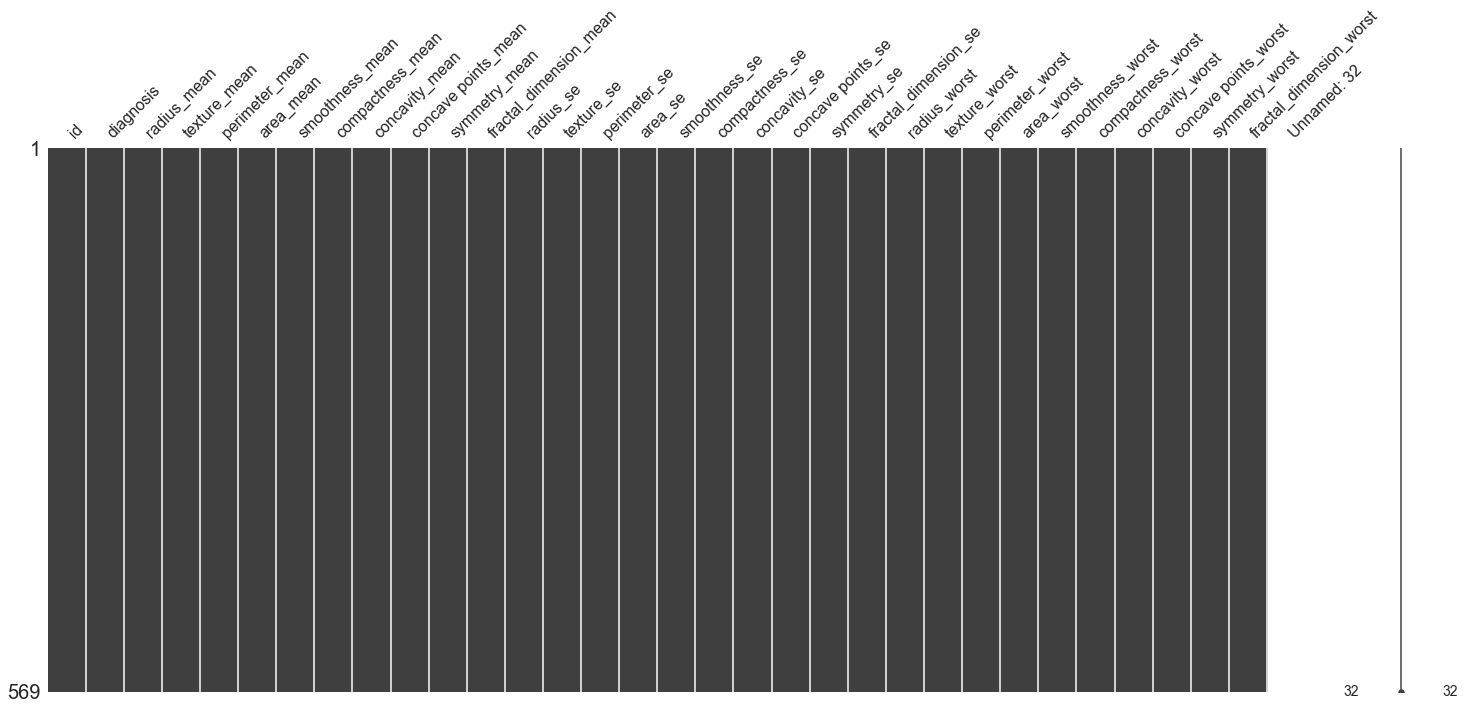

In [5]:
import missingno as msno
msno.matrix(df)

<AxesSubplot:>

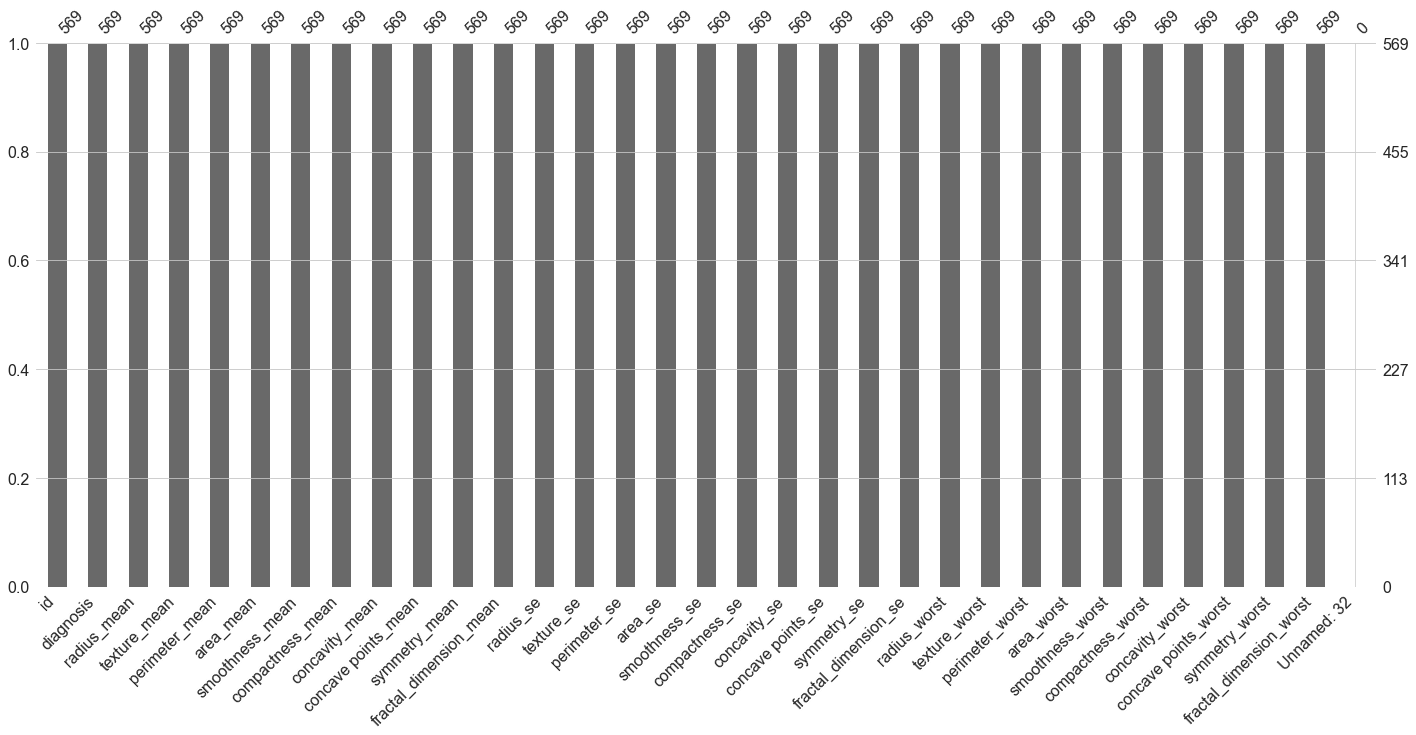

In [6]:
msno.bar(df)

In [7]:
# delete the "Unnamed: 32" column sine it contains no values
del df['Unnamed: 32']

### Univariate Data Analysis
<br>

##### Descriptive statistics of the whole dataset
<br>

In [8]:
df.drop('id',axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


##### Descriptive statistics of the "Benign" tumor
<br>

In [9]:
df[df['diagnosis'] == 'B'].describe().T

,count,mean,std,min,25%,50%,75%,max
id,357.0,2.654382e+07,1.167397e+08,8913.000000,874662.000000,908916.000000,8.812816e+06,9.113205e+08
radius_mean,357.0,1.214652e+01,1.780512e+00,6.981000,11.080000,12.200000,1.337000e+01,1.785000e+01
texture_mean,357.0,1.791476e+01,3.995125e+00,9.710000,15.150000,17.390000,1.976000e+01,3.381000e+01
perimeter_mean,357.0,7.807541e+01,1.180744e+01,43.790000,70.870000,78.180000,8.610000e+01,1.146000e+02
area_mean,357.0,4.627902e+02,1.342871e+02,143.500000,378.200000,458.400000,5.511000e+02,9.921000e+02
smoothness_mean,357.0,9.247765e-02,1.344608e-02,0.052630,0.083060,0.090760,1.007000e-01,1.634000e-01
compactness_mean,357.0,8.008462e-02,3.374995e-02,0.019380,0.055620,0.075290,9.755000e-02,2.239000e-01
concavity_mean,357.0,4.605762e-02,4.344215e-02,0.000000,0.020310,0.037090,5.999000e-02,4.108000e-01
concave points_mean,357.0,2.571741e-02,1.590878e-02,0.000000,0.015020,0.023440,3.251000e-02,8.534000e-02
symmetry_mean,357.0,1.741860e-01,2.480676e-02,0.106000,0.158000,0.171400,1.890000e-01,2.743000e-01


##### Descriptive statistics of the "Malignant" tumor  
<br>

In [10]:
df[df['diagnosis'] == 'M'].describe().T

,count,mean,std,min,25%,50%,75%,max
id,212.0,3.681805e+07,1.378965e+08,8670.000000,861345.000000,895366.500000,8.911290e+06,9.112962e+08
radius_mean,212.0,1.746283e+01,3.203971e+00,10.950000,15.075000,17.325000,1.959000e+01,2.811000e+01
texture_mean,212.0,2.160491e+01,3.779470e+00,10.380000,19.327500,21.460000,2.376500e+01,3.928000e+01
perimeter_mean,212.0,1.153654e+02,2.185465e+01,71.900000,98.745000,114.200000,1.299250e+02,1.885000e+02
area_mean,212.0,9.783764e+02,3.679380e+02,361.600000,705.300000,932.000000,1.203750e+03,2.501000e+03
smoothness_mean,212.0,1.028985e-01,1.260824e-02,0.073710,0.094010,0.102200,1.109250e-01,1.447000e-01
compactness_mean,212.0,1.451878e-01,5.398750e-02,0.046050,0.109600,0.132350,1.724000e-01,3.454000e-01
concavity_mean,212.0,1.607747e-01,7.501933e-02,0.023980,0.109525,0.151350,2.030500e-01,4.268000e-01
concave points_mean,212.0,8.799000e-02,3.437391e-02,0.020310,0.064620,0.086280,1.031750e-01,2.012000e-01
symmetry_mean,212.0,1.929090e-01,2.763809e-02,0.130800,0.174050,0.189900,2.098500e-01,3.040000e-01


#### Column : diagnosis
<br>

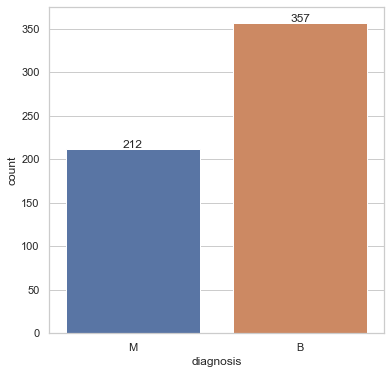

In [11]:
sns.set_theme(style="whitegrid")
fig,ax = plt.subplots(figsize = (6,6))
sns.countplot(x="diagnosis", data=df)
#annotatinos
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")

#### <li>About 37.2 % (212) of the total patients (569) are malignant tumor.

#### Check the distribution of the variables
<br>

In [12]:
def plotHistBox(col,hexColor = '#00aeff'):
    fig,ax = plt.subplots(ncols = 2,figsize = (15,4))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.7])
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    #set figure title
    ax0.set_title('Histplot with KDE estimates')
    ax1.set_title('Boxplot')
    sns.histplot(df[col], kde=True,color = hexColor,ax = ax0)
    #sns.kdeplot(df[col], color="red")
    sns.boxplot(x=df[col],color = hexColor,ax = ax1)
    fig.suptitle(f'Column : {col}', fontsize=16)
    

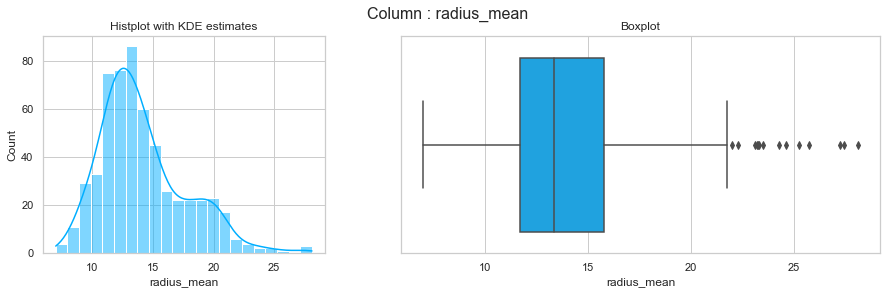

In [13]:
plotHistBox('radius_mean')

C:\Users\DK BORBORAH\conda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


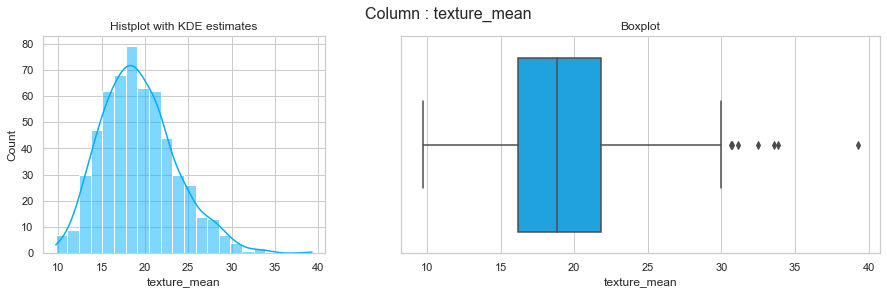

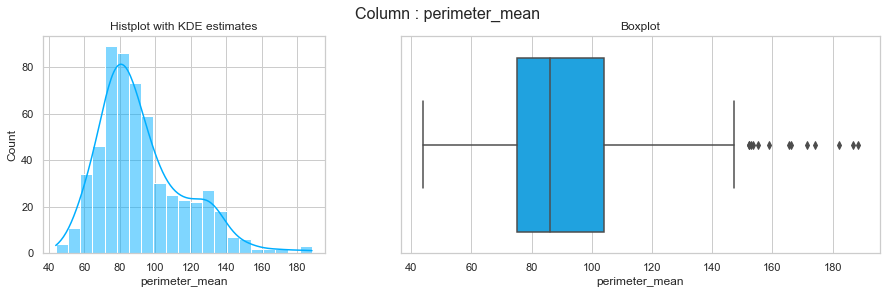

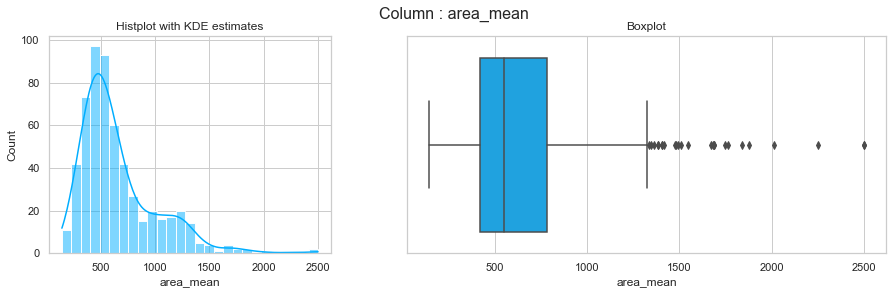

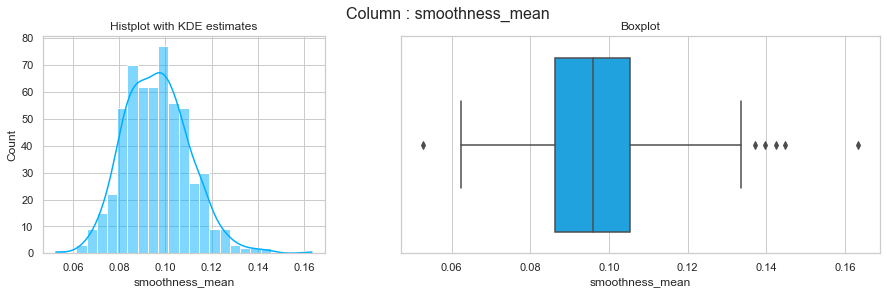

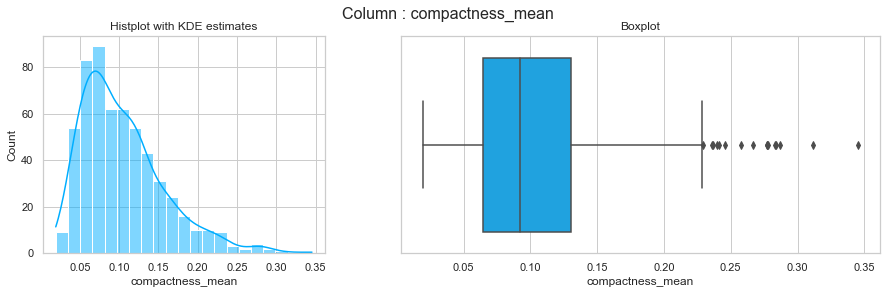

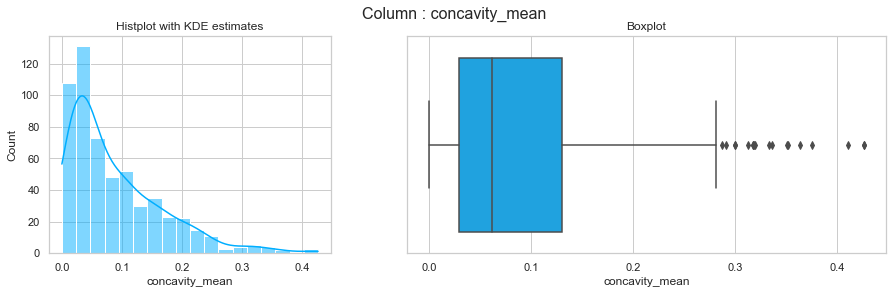

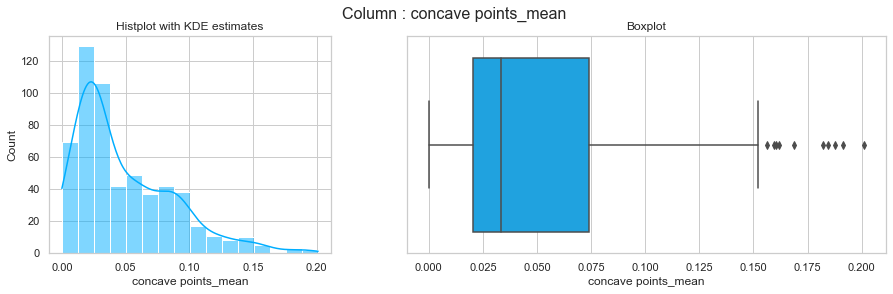

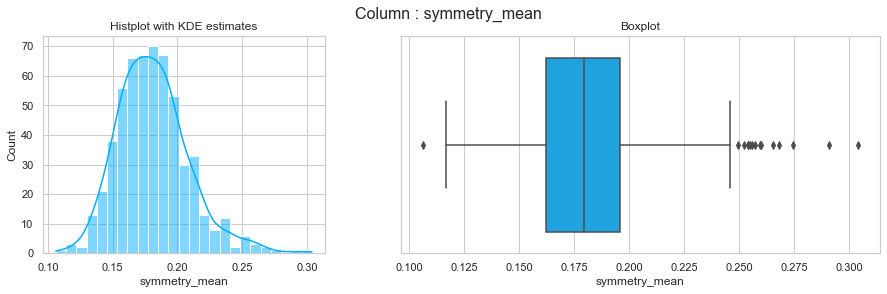

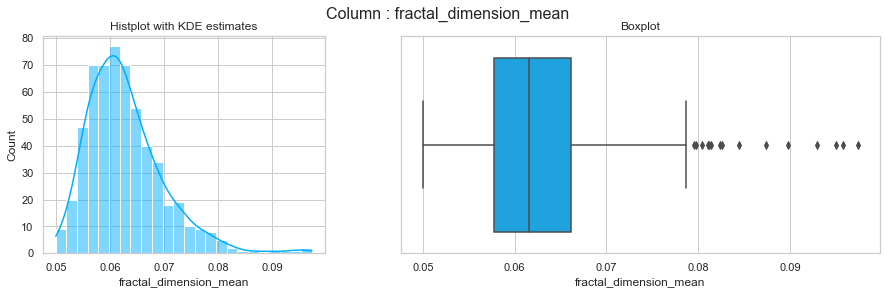

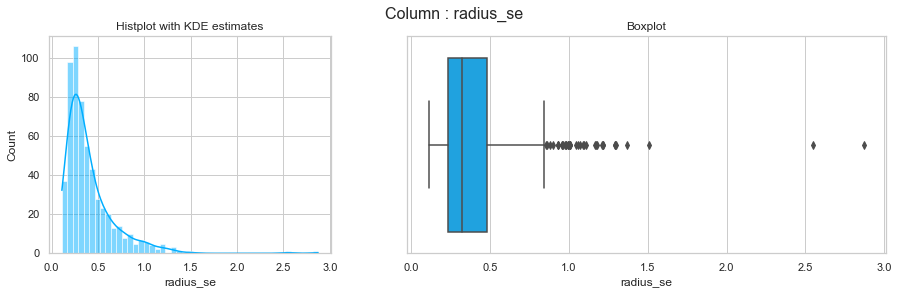

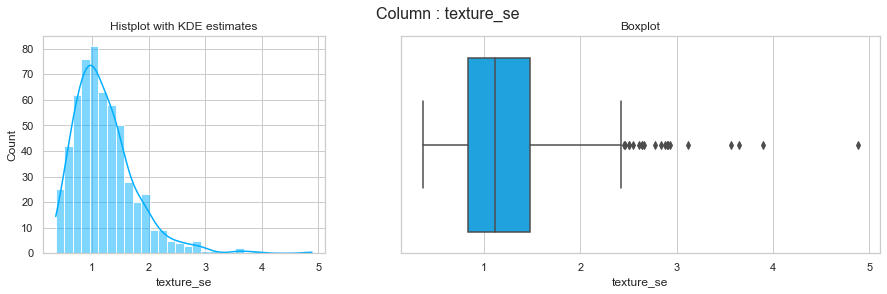

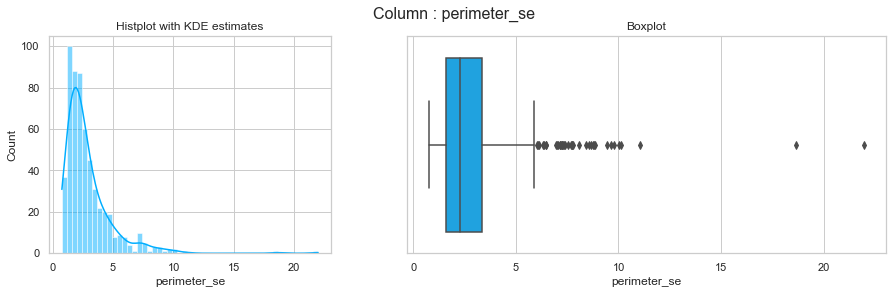

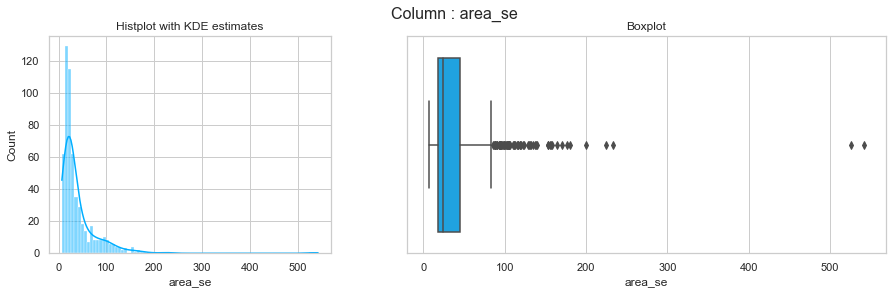

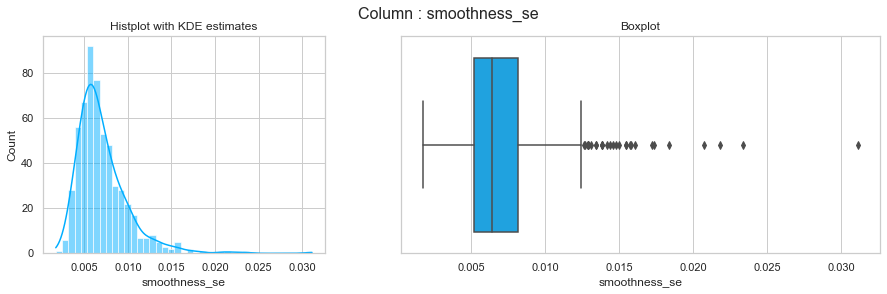

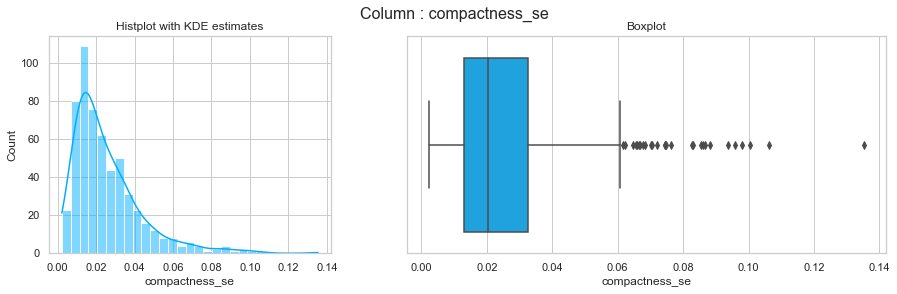

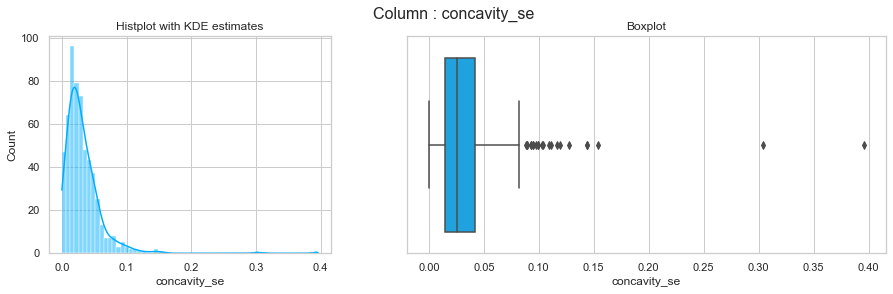

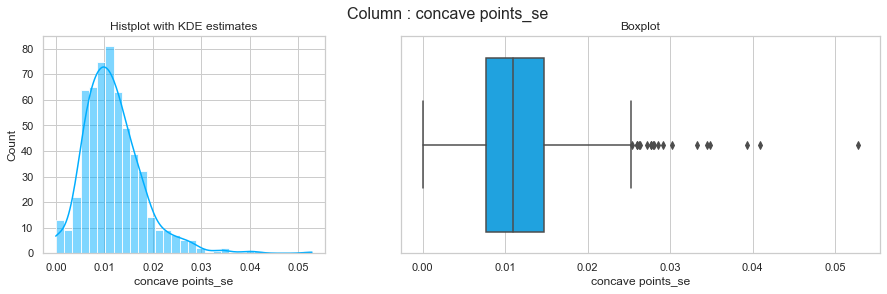

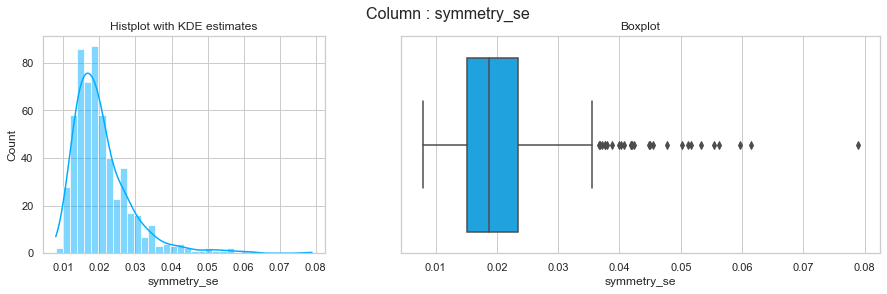

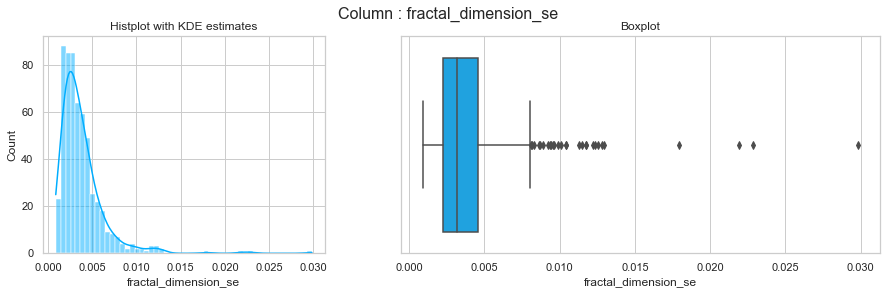

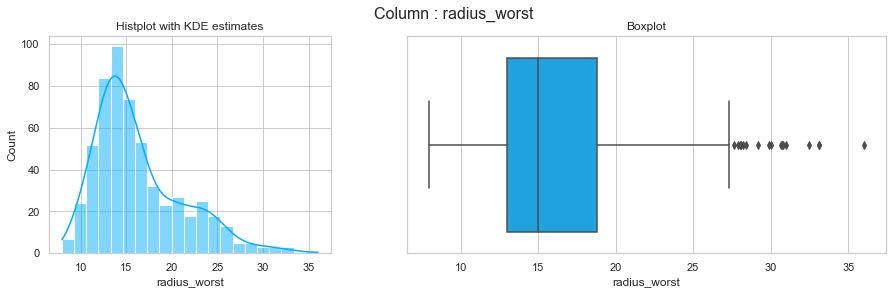

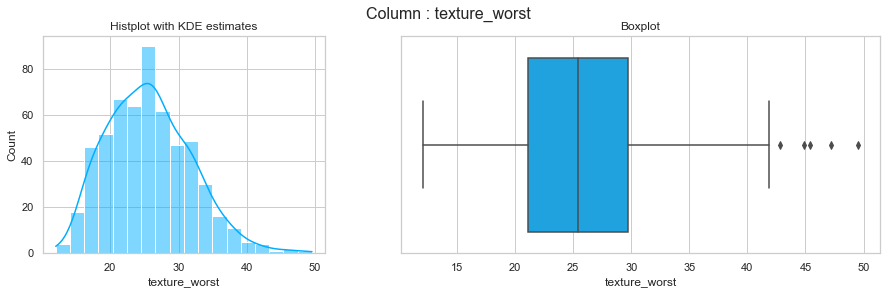

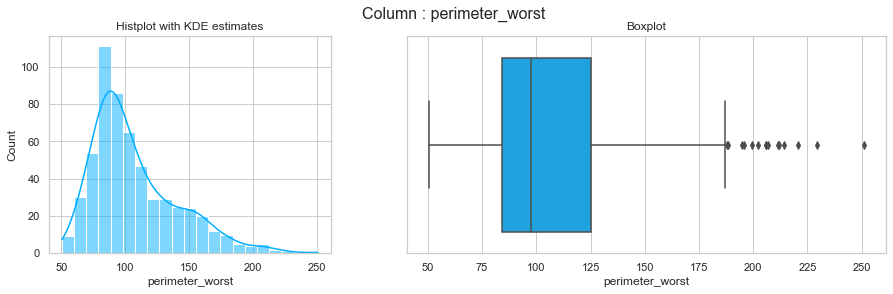

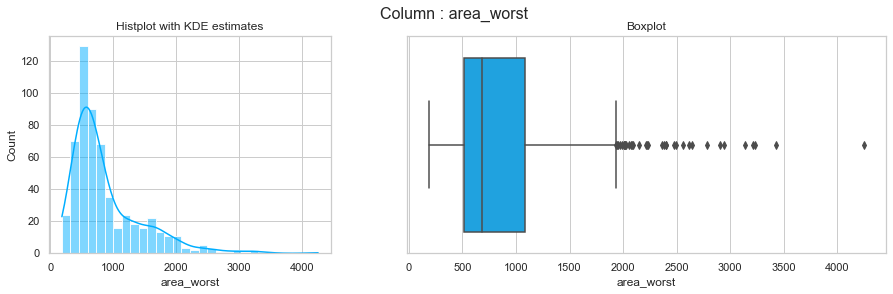

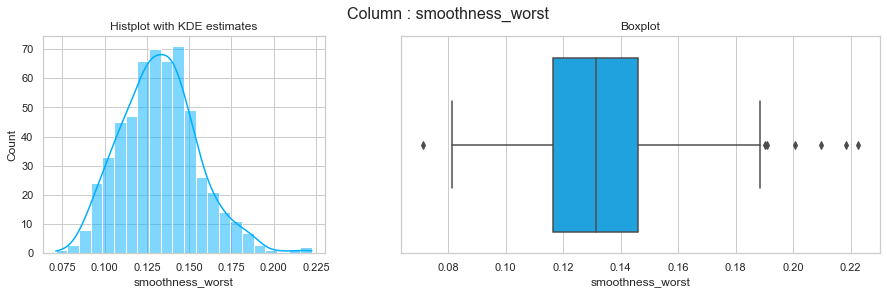

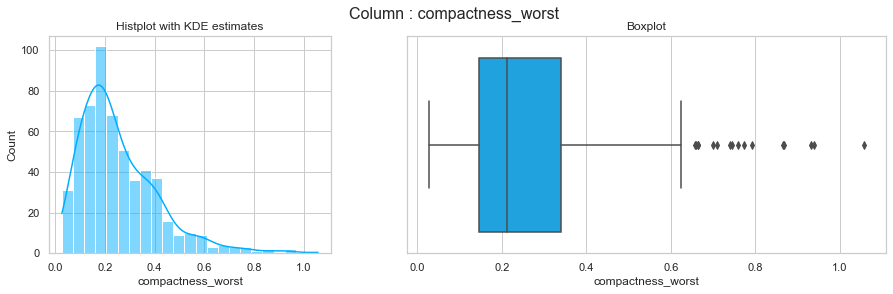

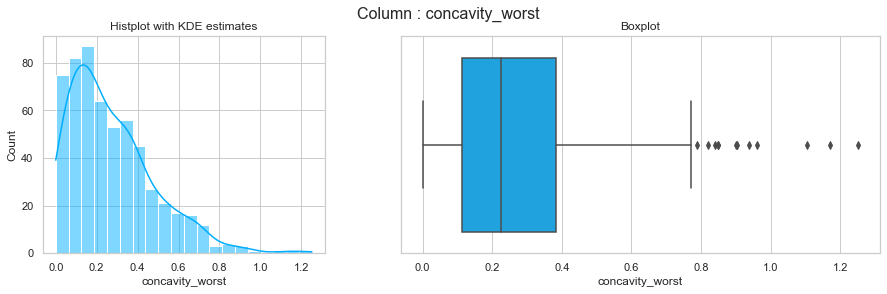

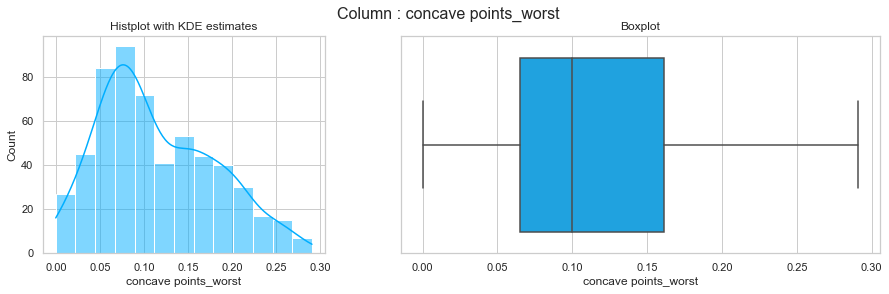

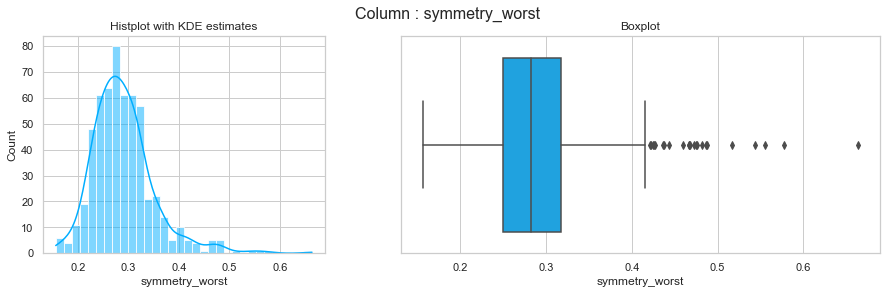

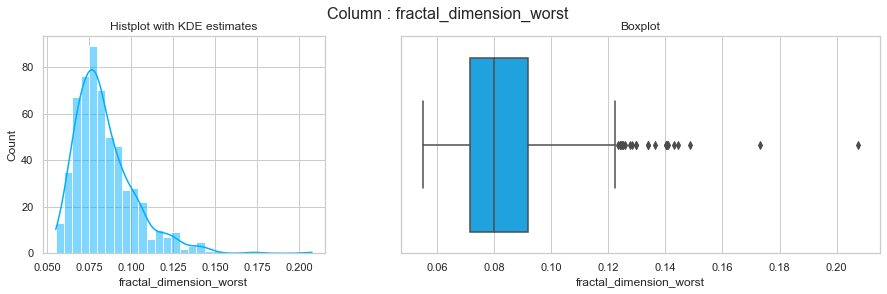

In [14]:
for col in df.columns[3:]:
    plotHistBox(col)

#### Check the skewness and kurtosis of the columns
<br>

In [15]:
kurtSkewDict = {
    "Skewness" : df.skew()[1:].values,
    "Kurtosis" : df.kurt()[1:].values,
}


The Gaussian distibution has a Skewness of 0 and Kurtosis of 3<br>
Let's check the skewness and kurtosis of the variables

In [16]:
#create a dataFrame for the Skewness and Kurtosis
kurtSkewFrame = pd.DataFrame(data=kurtSkewDict,index = df.columns[2:])
kurtSkewFrame

,Skewness,Kurtosis
radius_mean,0.942380,0.845522
texture_mean,0.650450,0.758319
perimeter_mean,0.990650,0.972214
area_mean,1.645732,3.652303
smoothness_mean,0.456324,0.855975
compactness_mean,1.190123,1.650130
concavity_mean,1.401180,1.998638
concave points_mean,1.171180,1.066556
symmetry_mean,0.725609,1.287933
fractal_dimension_mean,1.304489,3.005892



### Bivariate Analysis
<br>

#### Check the distribution of the variables with respect to target 
<br>

In [17]:
def plotHistBoxBi(col):
    fig,ax = plt.subplots(ncols = 2,figsize = (15,4))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.5])
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    #set figure title
    ax0.set_title('Histplots')
    ax1.set_title('Boxplots')
    sns.histplot(data = df,x = col,hue= 'diagnosis',ax = ax0)
    #sns.kdeplot(df[col], color="red")
    sns.boxplot(data =df,x=col,y = 'diagnosis',hue= 'diagnosis',ax = ax1)
    fig.suptitle(f'Column : {col}', fontsize=16)

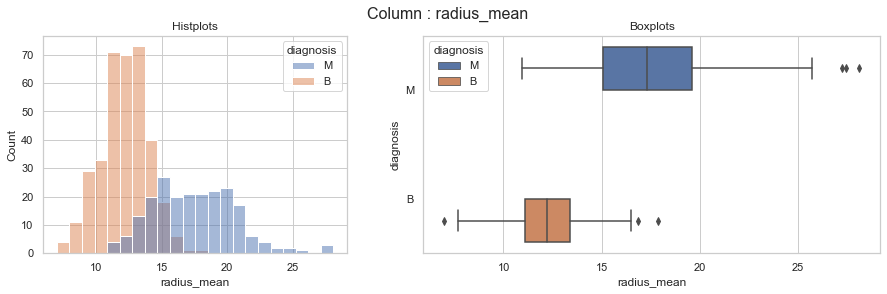

In [18]:
plotHistBoxBi('radius_mean')

C:\Users\DK BORBORAH\conda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


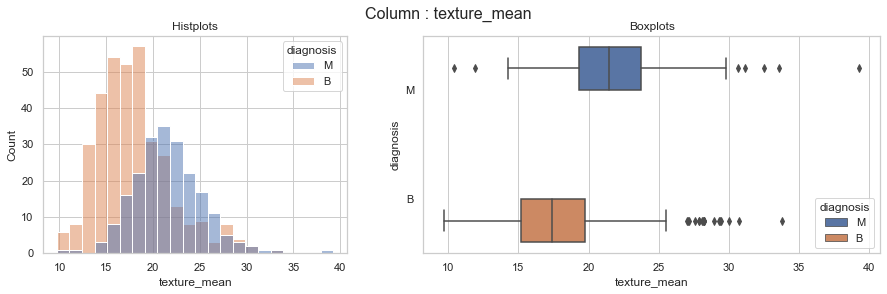

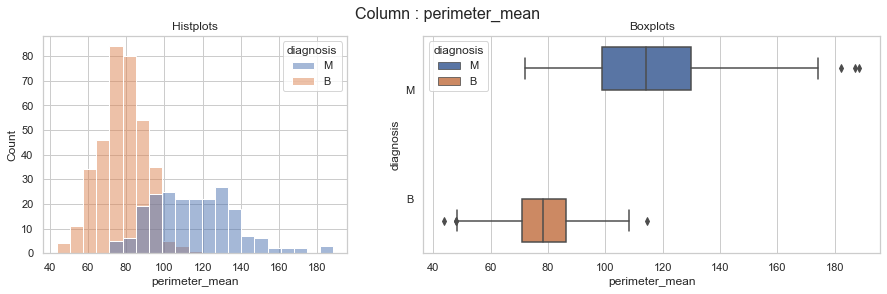

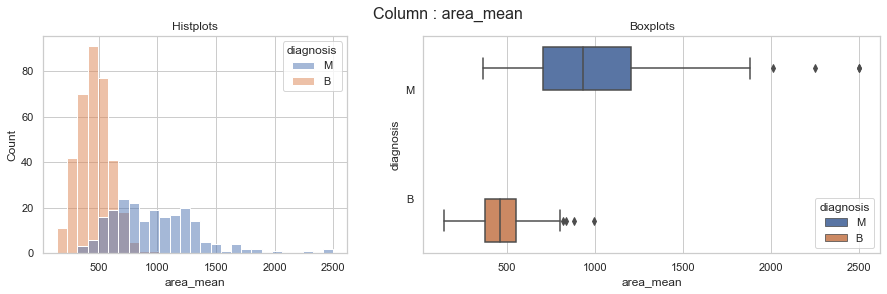

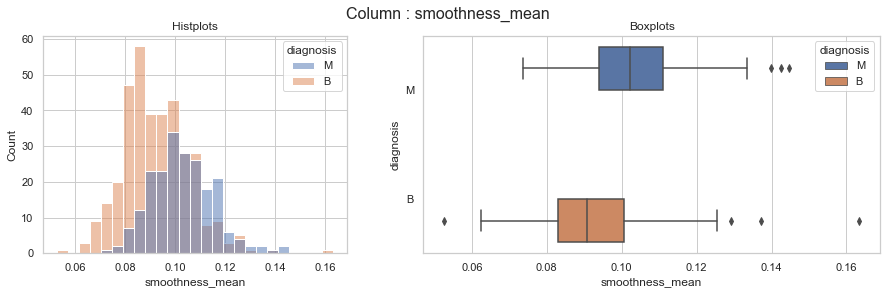

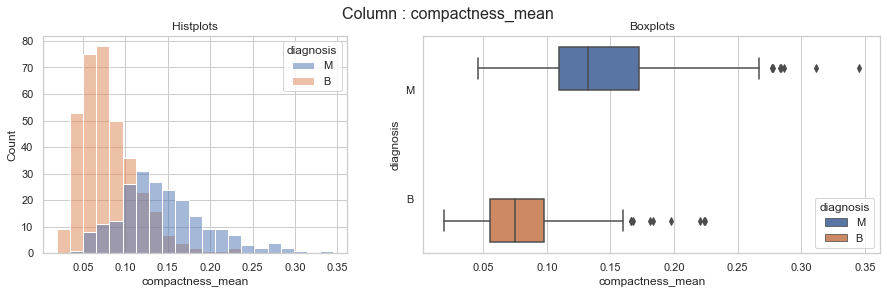

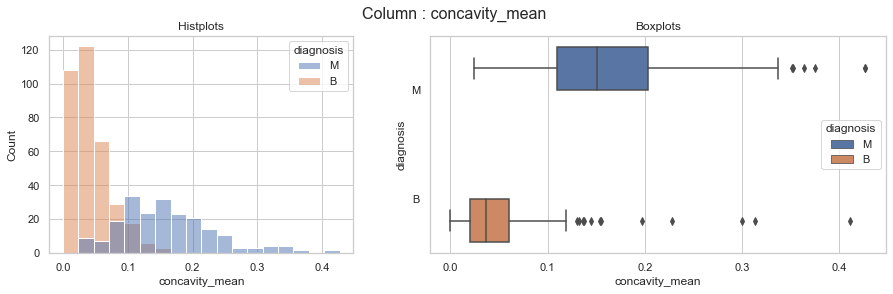

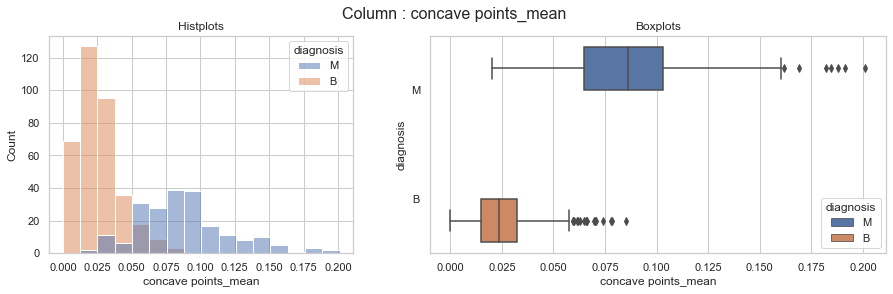

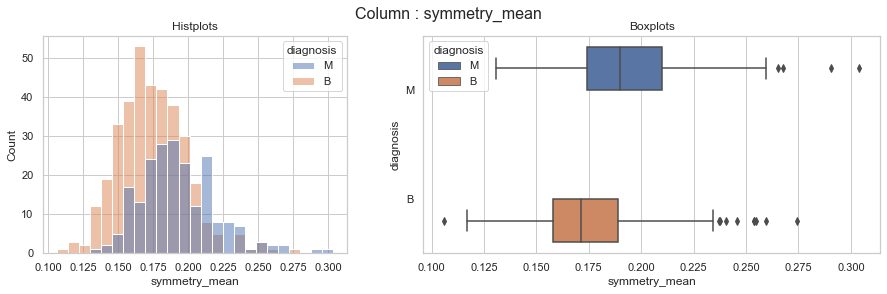

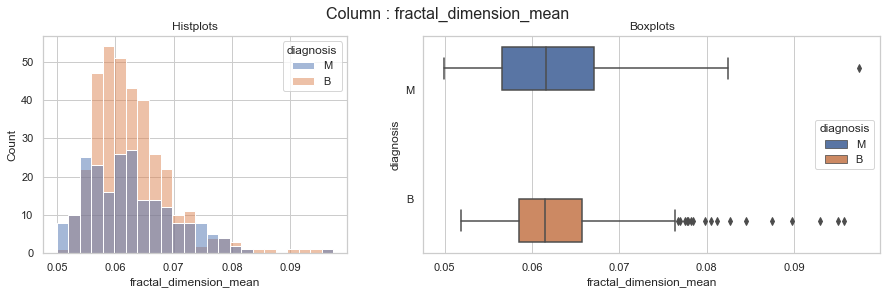

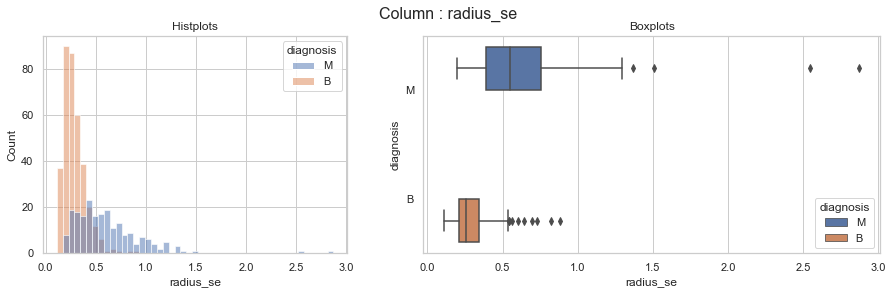

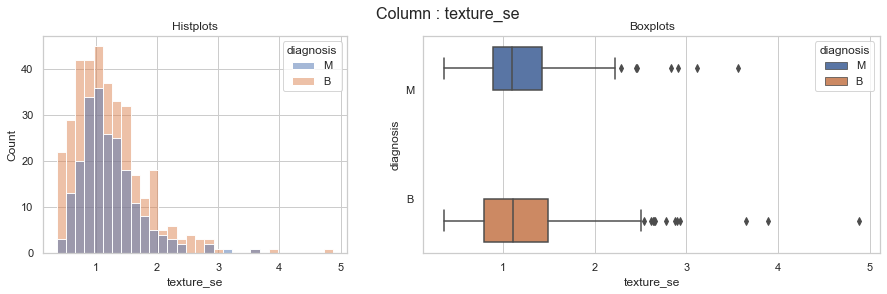

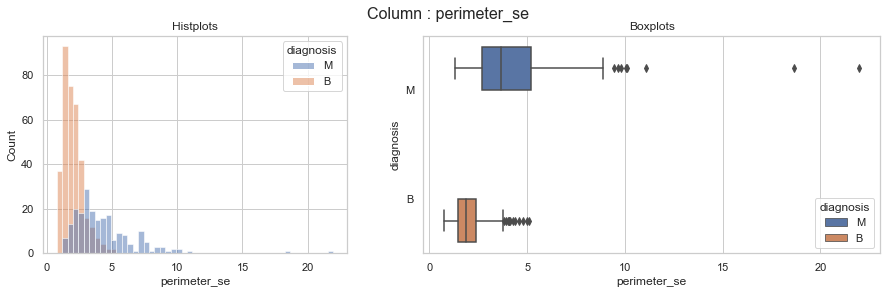

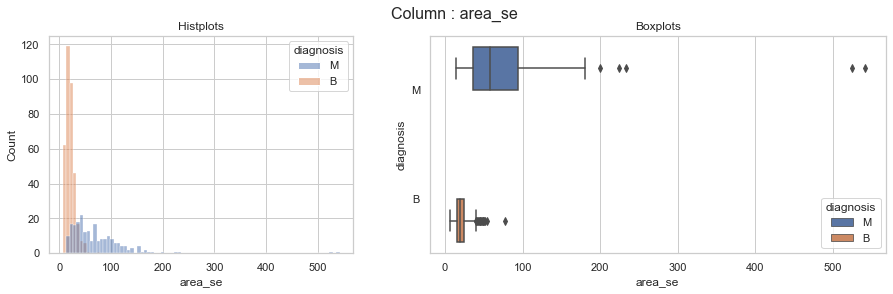

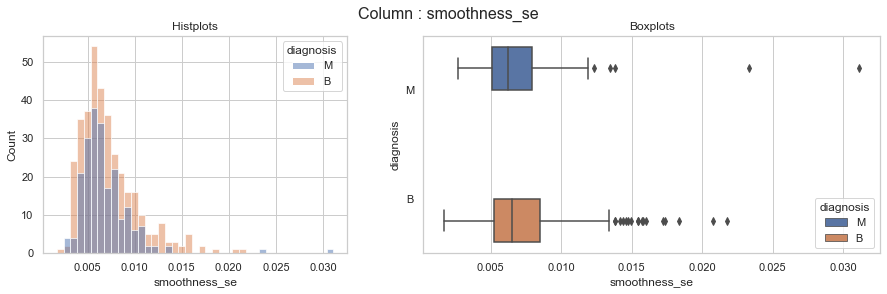

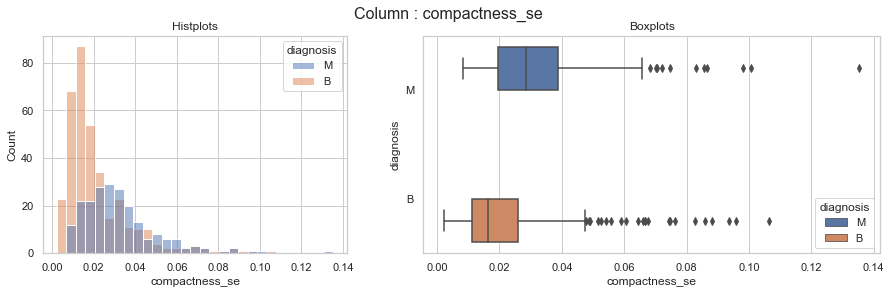

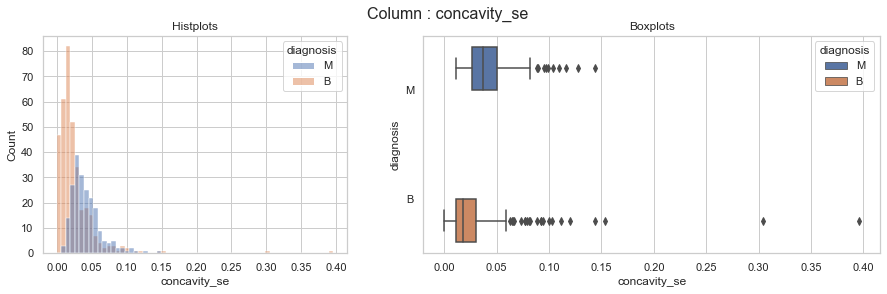

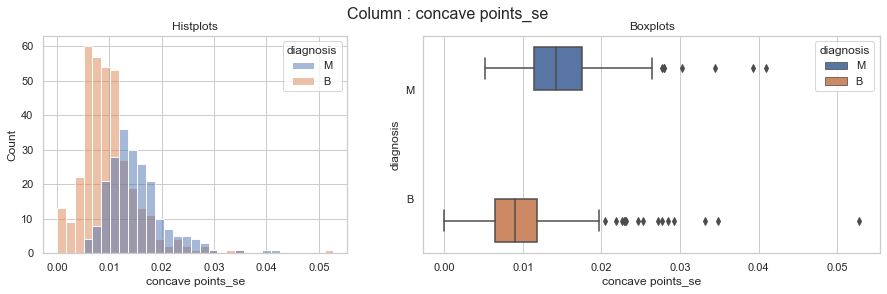

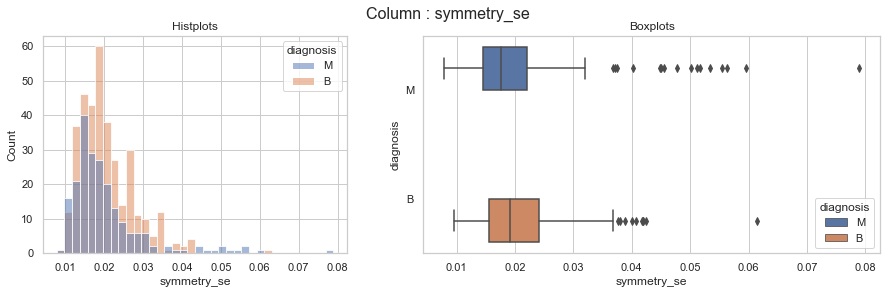

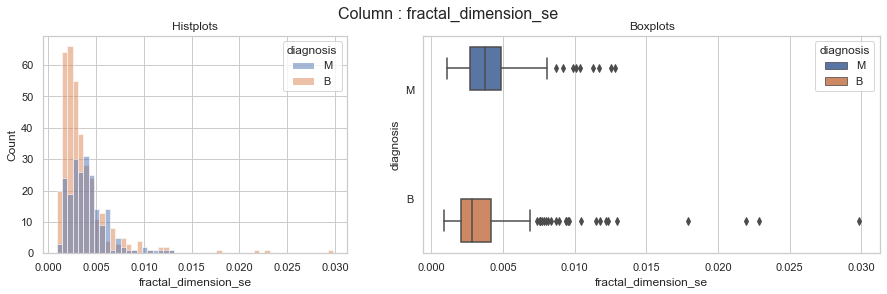

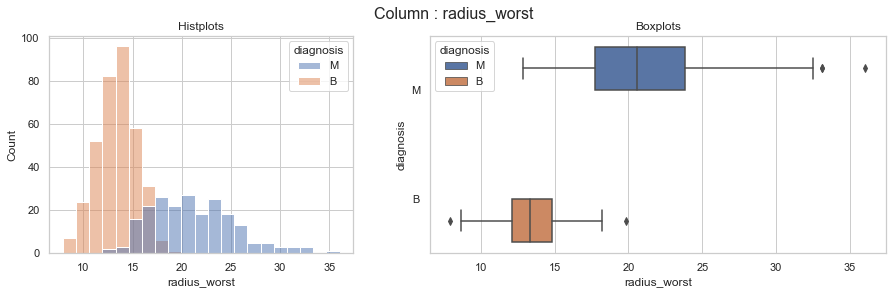

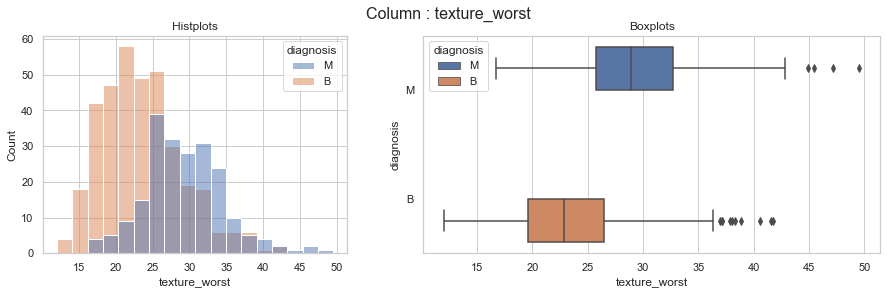

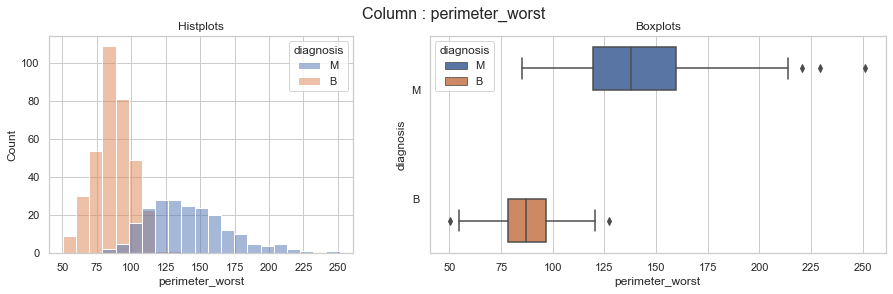

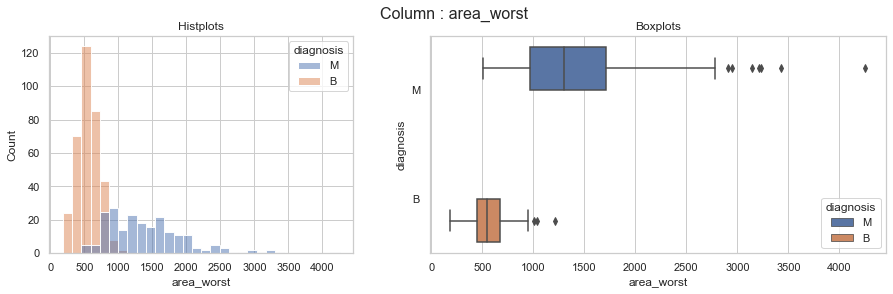

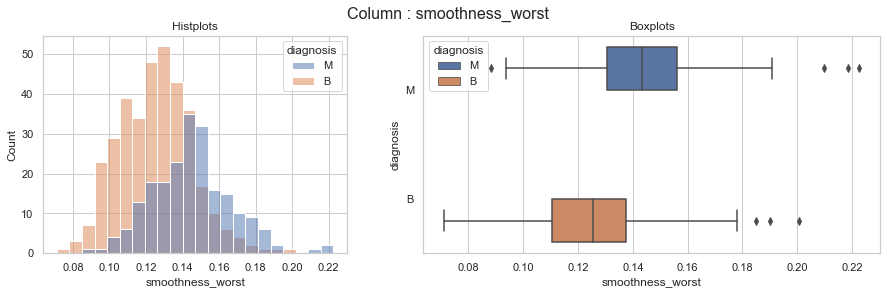

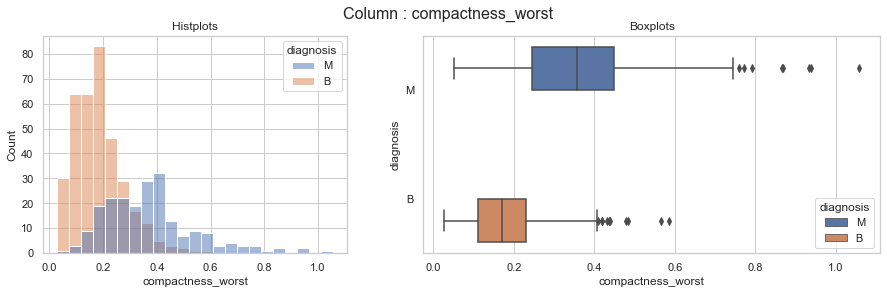

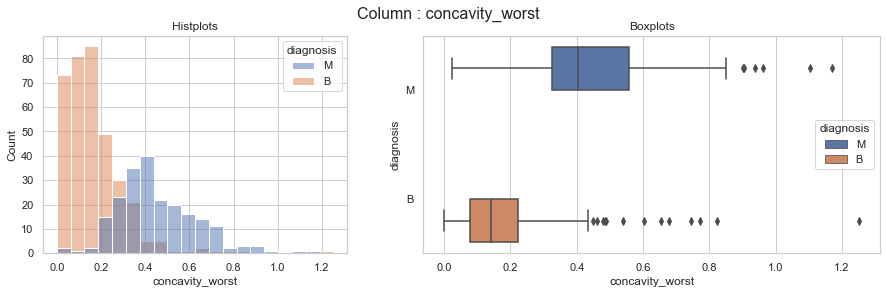

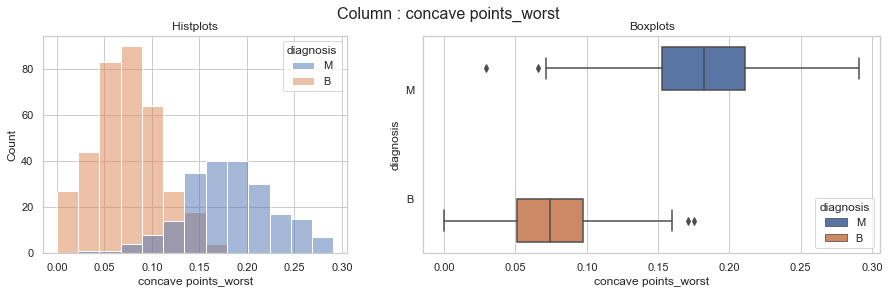

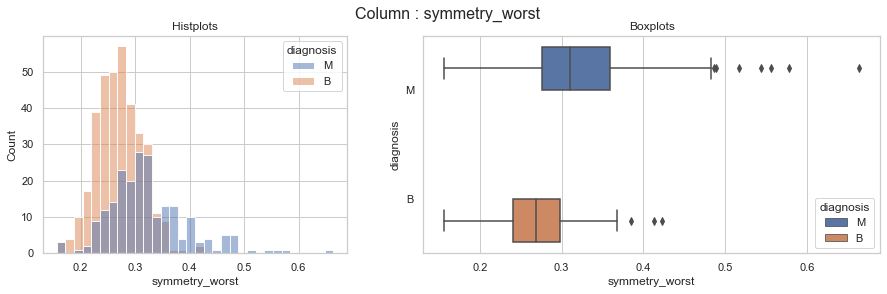

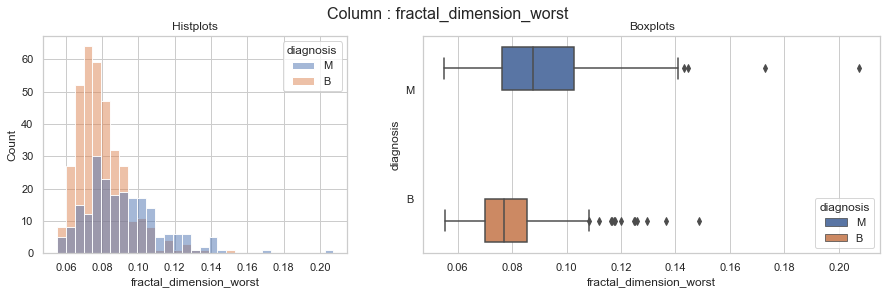

In [19]:
for col in df.columns[3:]:
    plotHistBoxBi(col)

#### Check the correlation

In [20]:
#create a class to return the top correlated features and also plot them
class correlationInfo():
    
    def __init__(self,col):
        self.col = col
        self.corrFrame = df[df.columns[2:]].corr()[self.col].sort_values(ascending = False)[1:].head(9)
        
    def corrVal(self):
        corrFrame = self.corrFrame.to_frame()
        corrFrame.columns = ['Correlation_values']
        print(f'Top nine features most correlatd to {col}')
        return corrFrame
    
    def correlationPlot(self):
        #grab the top nine most correlated attributes with the col
        corrCol = self.corrFrame.index
        fig,ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
        nrow = 0
        ncol = 0
        for cor_col in corrCol:
            sns.scatterplot(data=df, x=self.col, y=cor_col, hue="diagnosis", size="diagnosis",ax = ax[nrow,ncol])
            ncol += 1
            if ncol ==3:
                nrow +=1
                ncol =0
        fig.suptitle(f'Top 9 most correated features with {self.col}',size = 16)        
    
        

In [21]:
correlationInfo('radius_mean').corrVal()

Top nine features most correlatd to fractal_dimension_worst


,Correlation_values
perimeter_mean,0.997855
area_mean,0.987357
radius_worst,0.969539
perimeter_worst,0.965137
area_worst,0.941082
concave points_mean,0.822529
concave points_worst,0.744214
area_se,0.735864
radius_se,0.679090


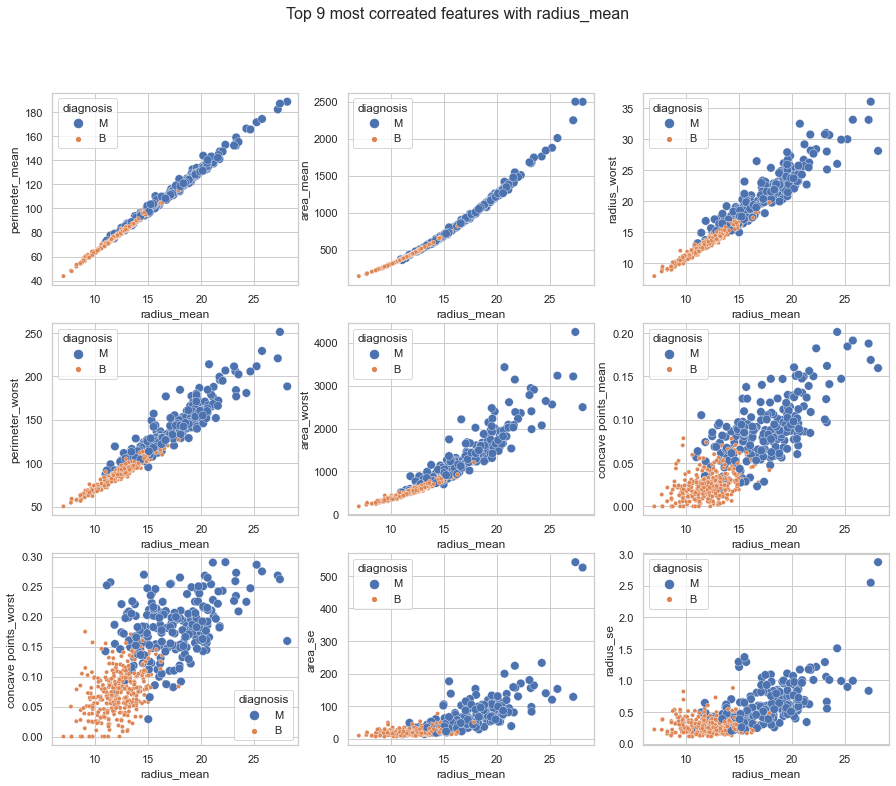

In [22]:
correlationInfo('radius_mean').correlationPlot()

In [23]:
correlationInfo('symmetry_worst').corrVal()

Top nine features most correlatd to fractal_dimension_worst


,Correlation_values
symmetry_mean,0.699826
compactness_worst,0.614441
fractal_dimension_worst,0.537848
concavity_worst,0.532520
compactness_mean,0.510223
concave points_worst,0.502528
smoothness_worst,0.493838
concavity_mean,0.409464
smoothness_mean,0.394309


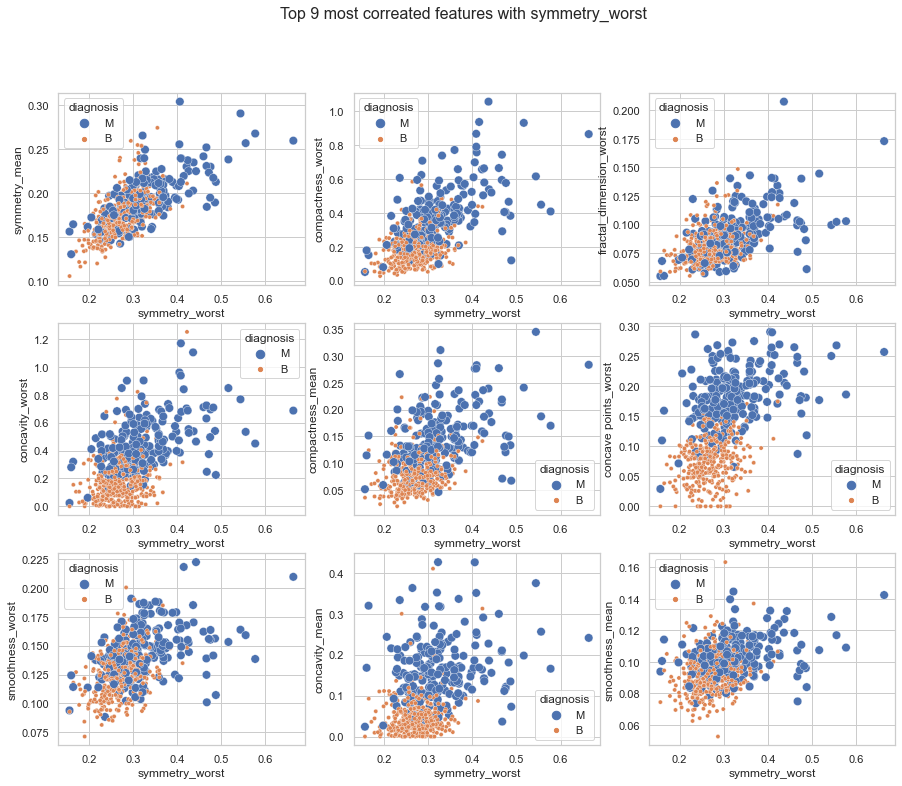

In [24]:
correlationInfo('symmetry_worst').correlationPlot()

##### You can plot as check for as many features you want!!!
<br>

### Multivariat Data Analysis

In [31]:
#change the label of the target variables
df['diagnosis_e'] = df['diagnosis'].replace(['M'],1)
df['diagnosis_e'] = df['diagnosis_e'].replace(['B'],0)

In [33]:
print('The top nine features most correlated with Malignant tumor is ')
df.corr()['diagnosis_e'].sort_values(ascending = False)[1:].head(9)

The top nine features most correlated with Malignant tumor is 


concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis_e, dtype: float64

Pair plot of the top features with most correlation with the target (part-1)


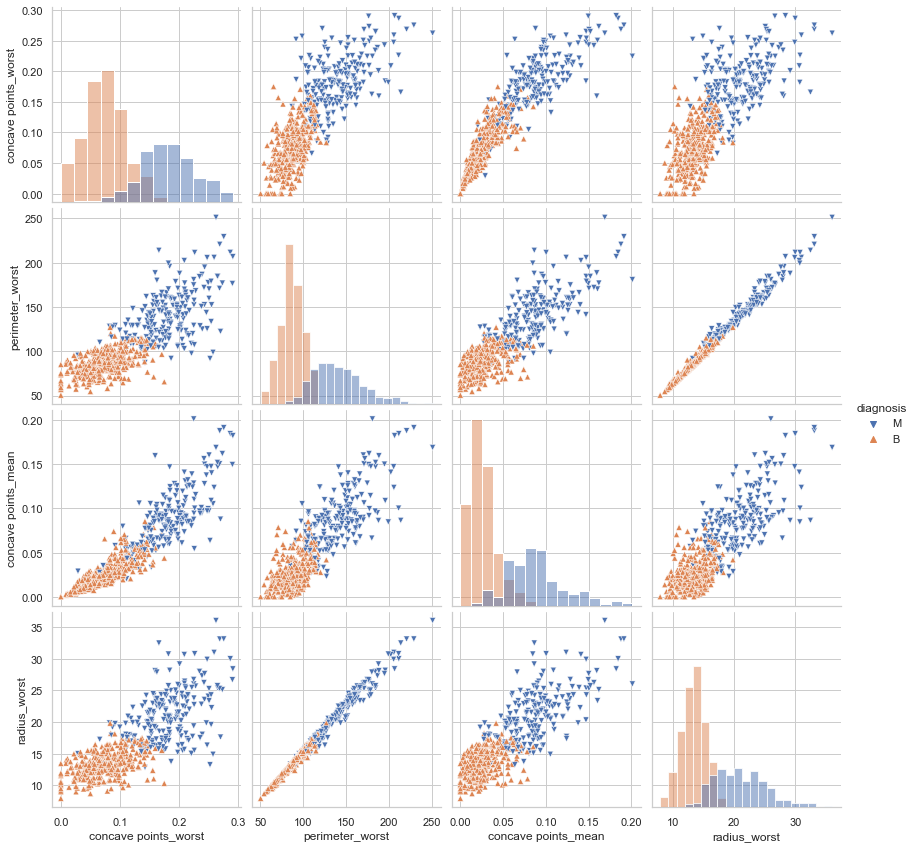

In [55]:
print("Pair plot of the top features with most correlation with the target (part-1)")
sns.pairplot(df,vars = df.corr()
             ['diagnosis_e'].sort_values(ascending = False)[1:].head(4).index,
             hue="diagnosis",diag_kind="hist",height=3,markers=['v', '^'])

Pair plot of the top features with most correlation with the target (part-2)


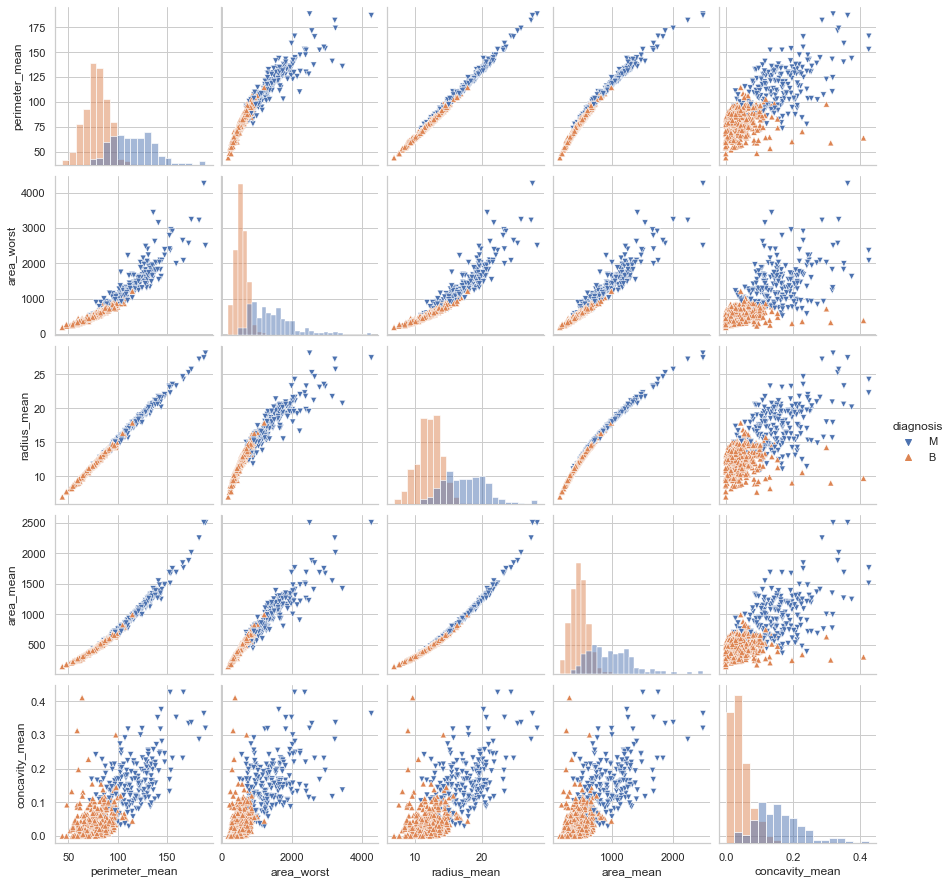

In [56]:
print("Pair plot of the top features with most correlation with the target (part-2)")
sns.pairplot(df,vars = df.corr()
             ['diagnosis_e'].sort_values(ascending = False)[1:][4:9].index,
             hue="diagnosis",diag_kind="hist",markers=['v', '^'])

### Variable transformation (if necesary)
<br>

In [59]:
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(9,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

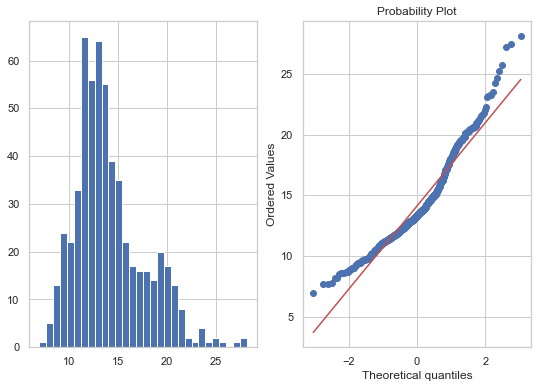

In [61]:
diagnostic_plots(df,'radius_mean')